In [8]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

We chose task number 1. To analzye and predcit how a stock is going to change we need to use regression analysis. Regression analysis is designed to predict numeral outcomes, therefore making it suitable for this case.

Mean Squared Error: 172.26
R² Score: -0.01


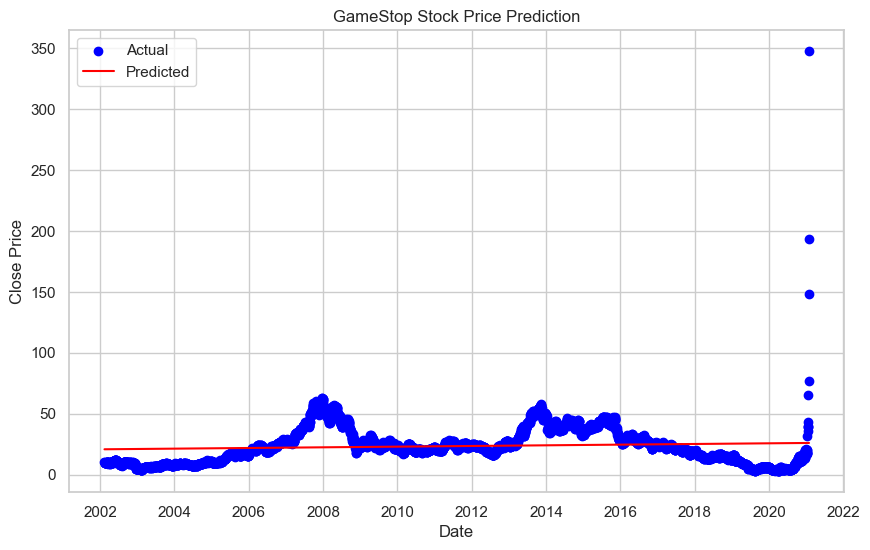

Confusion Matrix:
 [[172 324]
 [  0 459]]


In [35]:
# Load and prepare data
df = pd.read_csv('GME_stock.csv')
df['date'] = pd.to_datetime(df['date'])
df['Date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)


df_sorted = df.sort_values('date')

# Define features and target
X = df[['Date_ordinal']]
y = df['close_price']

# Train-Test Split. This divides the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot results
# Sort the dataframe by date for plotting
df_sorted = df.sort_values('date').copy()
# Predict close price for all dates for smooth plotting
df_sorted['Predicted_Close'] = model.predict(df_sorted[['Date_ordinal']])

plt.figure(figsize=(10,6))
plt.scatter(df_sorted['date'], df_sorted['close_price'], color='blue', label='Actual')
plt.plot(df_sorted['date'], df_sorted['Predicted_Close'], color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GameStop Stock Price Prediction')
plt.legend()
plt.show()

# Confusion Matrix. This is meant for classification, but we have it here anyways for completeness for the oblig.
# Convert regression output to classification for confusion matrix
threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)


Mean Squared Error: 208.96
R² Score: 0.01


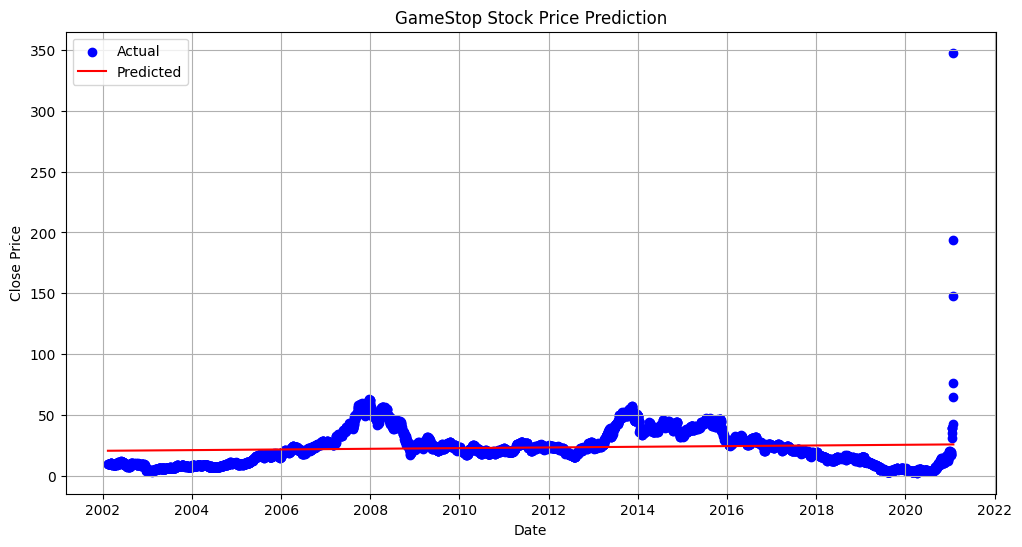

Confusion Matrix:
 [[ 775 1612]
 [   0 2386]]


In [11]:
# 📌 Step 2: Load and Prepare Data
df = pd.read_csv('GME_stock.csv')
df['date'] = pd.to_datetime(df['date'])
df['Date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)


# 📌 Step 4: Define Features and Target
X = df_sorted[['Date_ordinal']]
y = df_sorted['close_price']


# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Train on All Data
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Step 6: Predict on All Data
y_pred = model.predict(X)

# 📌 Step 7: Accuracy Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📌 Step 8: Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.scatter(df_sorted['date'], df_sorted['close_price'], color='blue', label='Actual')
plt.plot(df_sorted['date'], df_sorted['Predicted_Close'], color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GameStop Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Step 9: Confusion Matrix (Discretized)
threshold = y.median()
y_class = (y > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_class, y_pred_class)
print("Confusion Matrix:\n", cm)


Mean Squared Error: 116.54
R² Score: 0.04


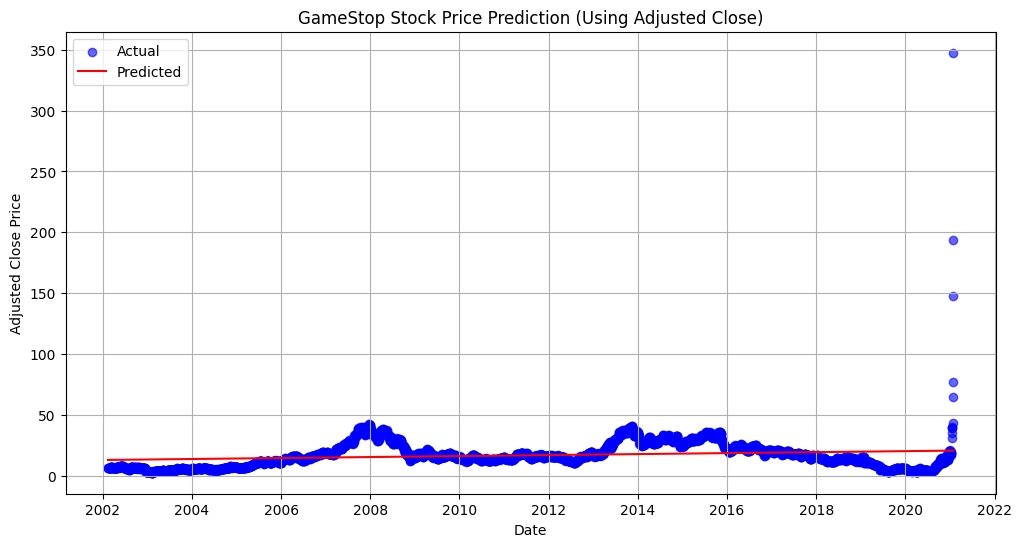

Confusion Matrix:
 [[1116 1271]
 [ 394 1992]]

Actual Adjusted Close Prices on 1st of Each Month in 2008 and 2021:


,date,adjclose_price
3270,2008-02-01,35.361721
3230,2008-04-01,37.482624
3208,2008-05-01,37.967396
3166,2008-07-01,27.436975
3144,2008-08-01,26.817549
3102,2008-10-01,24.265736
3060,2008-12-01,13.028357


,date,adjclose_price
208,2020-04-01,3.25
187,2020-05-01,6.05
167,2020-06-01,4.13
145,2020-07-01,4.44
102,2020-09-01,7.65
81,2020-10-01,9.77
39,2020-12-01,15.80


In [12]:
# 📌 Step 2: Load and Prepare Data
df = pd.read_csv('GME_stock.csv')
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['Date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

# 📌 Step 3: Sort Chronologically
df_sorted = df.sort_values('date')

# 📌 Step 4: Define Features and Target
X = df_sorted[['Date_ordinal']]
y = df_sorted['adjclose_price']  # ✅ Use adjusted close price

# 📌 Step 5: Train on All Data
model = LinearRegression()
model.fit(X, y)

# 📌 Step 6: Predict on All Data
y_pred = model.predict(X)
df_sorted['Predicted_AdjClose'] = y_pred

# 📌 Step 7: Accuracy Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📌 Step 8: Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.scatter(df_sorted['date'], df_sorted['adjclose_price'], label='Actual', color='blue', alpha=0.6)
plt.plot(df_sorted['date'], df_sorted['Predicted_AdjClose'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('GameStop Stock Price Prediction (Using Adjusted Close)')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Step 9: Confusion Matrix (Discretized)
threshold = y.median()
y_class = (y > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_class, y_pred_class)
print("Confusion Matrix:\n", cm)

# 📌 Step 10: Print Actual Prices on 1st of Each Month in 2008
monthly_check08 = df_sorted[(df_sorted['date'].dt.day == 1) & (df_sorted['date'].dt.year.isin([2008]))]
monthly_check20 = df_sorted[(df_sorted['date'].dt.day == 1) & (df_sorted['date'].dt.year.isin([2020]))]
print("\nActual Adjusted Close Prices on 1st of Each Month in 2008 and 2021:")
display(monthly_check08[['date', 'adjclose_price']])
display(monthly_check20[['date', 'adjclose_price']])


Mean Squared Error: 0.99
R^2 Score: 0.99


/var/folders/sj/vkbmrtd10wl82tvhxc4_hsx80000gn/T/ipykernel_23367/4153840211.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # fill NaNs


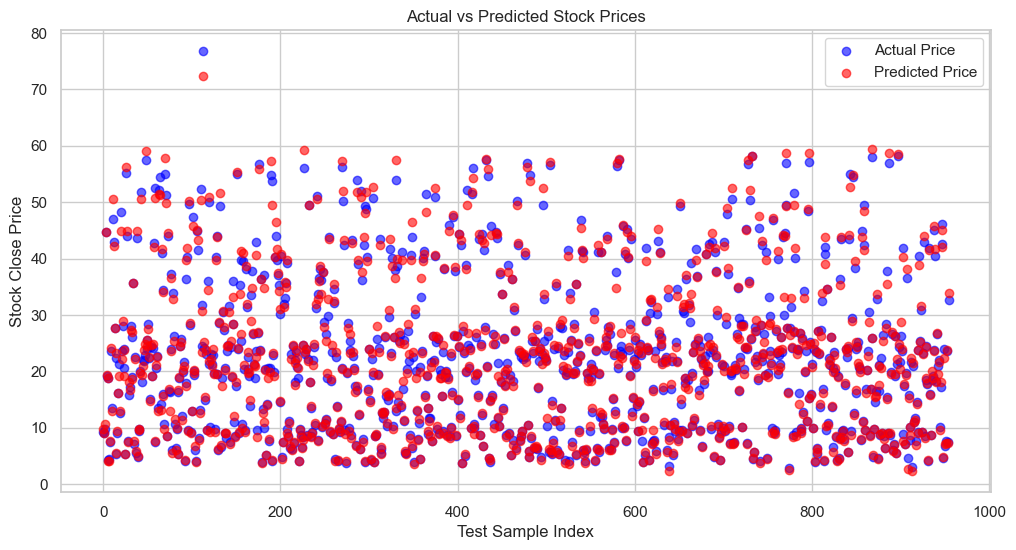

Predicted stock price on 2025-10-20: $272.94


In [26]:
# -----------------------------
# Stock Price Prediction Workflow
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

# Step 1: Load the dataset
df = pd.read_csv('GME_stock.csv')
df.columns = df.columns.str.strip()
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Step 2: Feature engineering
# Convert date to numeric (ordinal)
df['date_ordinal'] = df['date'].map(lambda d: d.toordinal())

# Optional: add moving averages as features
df['MA5'] = df['close_price'].rolling(window=5).mean()
df['MA10'] = df['close_price'].rolling(window=10).mean()
df.fillna(method='bfill', inplace=True)  # fill NaNs

# Step 3: Prepare features and target
X = df[['date_ordinal', 'MA5', 'MA10']]
y = df['close_price']

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions on test set
y_pred = model.predict(X_test)

# Step 8: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 9: Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Price')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.6, label='Predicted Price')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# Step 10: Predict stock price for a specific date
import datetime
pred_date = datetime.datetime(2025, 10, 20)
# Use last available moving averages for prediction
last_ma5 = df['MA5'].iloc[-1]
last_ma10 = df['MA10'].iloc[-1]
pred_df = pd.DataFrame({'date_ordinal':[pred_date.toordinal()],
                        'MA5':[last_ma5], 'MA10':[last_ma10]})
pred_scaled = scaler.transform(pred_df)
pred_price = model.predict(pred_scaled)
print(f"Predicted stock price on {pred_date.date()}: ${pred_price[0]:.2f}")


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load data
data = pd.read_csv("GME_stock.csv")
data['date'] = pd.to_datetime(data['date'])
data['Date_ordinal'] = data['date'].map(lambda x: x.toordinal())

X = data[['Date_ordinal']]
y = data['close_price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions & accuracy
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Predict specific date
import datetime
date_to_predict = datetime.date(2025, 12, 1).toordinal()
predicted_price = model.predict([[date_to_predict]])

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Predicted GME price on 2025-12-01:", predicted_price[0])


Mean Squared Error: 208.94152559538816
R^2 Score: 0.007917196251284953
Predicted GME price on 2025-12-01: 26.57200462163621


/Users/elonasofie/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Note: The model performs poorly because stock prices are highly volatile and not well approximated by a simple linear trend. This task focuses on demonstrating ML usage rather than accuracy.

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Load your stock data
# Assume CSV has 'Date' and 'Close' columns
data = pd.read_csv("GME_stock.csv")
data['date'] = pd.to_datetime(data['date'])
data['Date_ordinal'] = data['date'].map(pd.Timestamp.toordinal)  # Convert dates to numbers

# Features and target
X = data[['Date_ordinal']]
y = data['close_price']

# Train linear regression
model = LinearRegression()
model.fit(X, y)

# Function to predict stock price for a given date
def predict_price(input_date):
    date_ordinal = pd.Timestamp(input_date).toordinal()
    predicted_price = model.predict([[date_ordinal]])
    return predicted_price[0]

# Example usage
date_to_predict = "2025-10-20"
price = predict_price(date_to_predict)
print(f"Predicted closing price on {date_to_predict}: {price:.2f}")


Predicted closing price on 2025-10-20: 26.54


/Users/elonasofie/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted closing price on 2025-10-20: 26.54


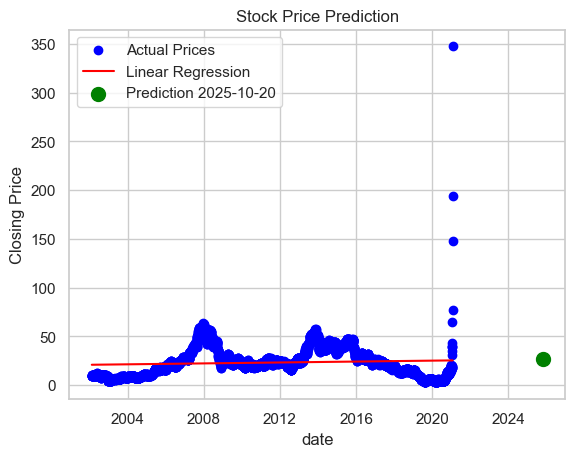

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
data = pd.read_csv('GME_stock.csv')  # your CSV with 'Date' and 'Close'
data['date'] = pd.to_datetime(data['date'])
data['DateOrdinal'] = data['date'].map(pd.Timestamp.toordinal)  # convert date to number

# Train linear regression
X = data['DateOrdinal'].values.reshape(-1, 1)
y = data['close_price'].values
model = LinearRegression()
model.fit(X, y)

# Predict for a specific date
future_date = pd.to_datetime('2025-10-20')
future_date_ord = np.array([[future_date.toordinal()]])
predicted_price = model.predict(future_date_ord)[0]
print(f"Predicted closing price on {future_date.date()}: {predicted_price:.2f}")

# Visualize
plt.scatter(data['date'], y, color='blue', label='Actual Prices')
plt.plot(data['date'], model.predict(X), color='red', label='Linear Regression')
plt.scatter(future_date, predicted_price, color='green', s=100, label='Prediction 2025-10-20')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
